**Terms**:

- UCB: mathematical decision-making formula for solving "Exploration-Exploitation trade-off"
- UCT: Tree policy used for selection and expansion phase of MCTS. Uses UCB for finding optimal action.
  <br>
  Reference: Bandit based Monte-Carlo Planning
  $$UCT = \frac{w_i}{n_i} +2 C_p \sqrt{\frac{2\ln N_p}{n_i}}$$


In [1]:
#!pip install numpy
#!pip install graphviz

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import random
from uct_mcts import MCTSNode
from tic_tac_toe import Tictactoe

In [17]:
from copy import deepcopy


game = Tictactoe()


def get_random_move():
    return random.randint(0, game.SIZE**2 - 1)


player = 1
if player == 0:
    random_player = game.O
    mcts_player = game.X
else:
    random_player = game.X
    mcts_player = game.O


mcts_visual = []
while not game.is_gameover():
    if game.turn == random_player:
        # Player turn
        move = get_random_move()
        while not game.is_valid_move(move):
            move = get_random_move()
        game.make_move(move)
    else:
        # MCTS AI turn
        # MCTS TURN
        root = MCTSNode(state=game)
        mcts_best_move = root.best_action(simulations_number=10)
        print("===mcts best move===", mcts_best_move)

        mcts_visual.append(
            (deepcopy(game), root.visualize_tree(selected_node=root.best_child()))
        )
        # mcts_visual.append(root.visualize_tree(selected_node=root.best_child()))
        game.make_move(mcts_best_move)


print("\n\nFinal Board:")
game.print_board()

if game.winner == game.X:
    print("X won!")
elif game.winner == game.O:
    print("O won!")
else:
    print("Draw!")

===mcts best move=== 3
===mcts best move=== 4
===mcts best move=== 5


Final Board:
_|X|_
O|O|O
X|X|_
O won!



Move #1 | MCTS: O | Random: X

Board:
_|_|_
_|_|_
_|X|_

MONTE CARLO TREE SEARCH:


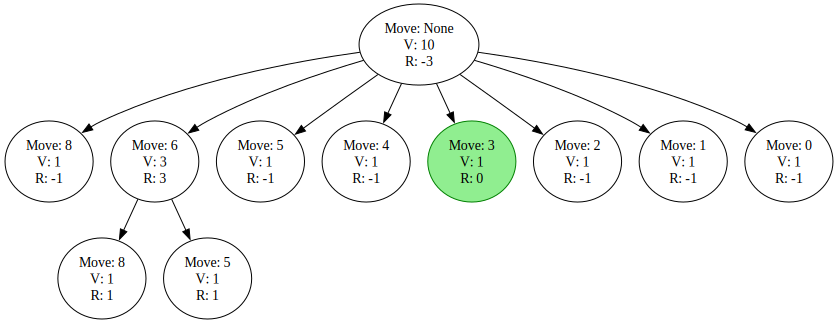


Move #2 | MCTS: O | Random: X

Board:
_|X|_
O|_|_
_|X|_

MONTE CARLO TREE SEARCH:


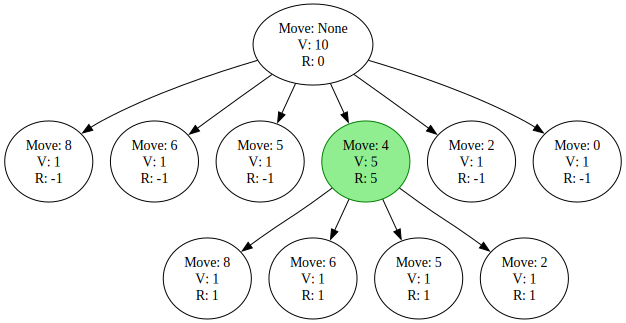


Move #3 | MCTS: O | Random: X

Board:
_|X|_
O|O|_
X|X|_

MONTE CARLO TREE SEARCH:


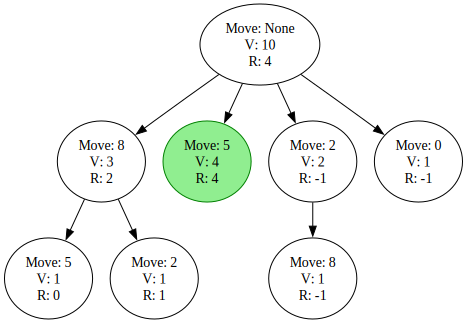

In [18]:
for i, (board, tree) in enumerate(mcts_visual):
    print(f"\n{'=' * 50}")
    print(f"Move #{i + 1} | MCTS: {mcts_player} | Random: {random_player}")
    print(f"{'=' * 50}")
    print("\nBoard:")
    board.print_board()
    print("\nMONTE CARLO TREE SEARCH:")
    display(tree)